In [2]:
import matplotlib.pyplot as plt
from arch import arch_model
import pandas_ta
import pandas as pd
import numpy as np
import os
import warnings

In [3]:
warnings.filterwarnings('ignore')



daily_df = pd.read_csv('BTC-USD.csv')

daily_df['Date'] = pd.to_datetime(daily_df['Date'])

daily_df = daily_df.set_index('Date')
daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()

daily_df['variance'] = daily_df['log_ret'].rolling(180).var()

daily_df = daily_df['2018':'2022-01-31']
daily_df.dropna()

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance
Date,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,-0.035900,0.003341
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,0.092589,0.003380
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,0.014505,0.003369
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,0.025858,0.003369
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,0.110945,0.003420
...,...,...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,0.007734,0.001148
2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,0.017248,0.001140
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,0.009321,0.001139


In [3]:
# Store the data as a panda dataframe
btc = pd.read_csv('BTC-USD.csv')
btc['Date'] = pd.to_datetime(btc['Date']) 
btc = btc.set_index('Date',inplace=True)
btc['log_ret'] = np.log(btc['Adj Close']).diff()
btc['variance'] = btc['log_ret'].rolling(180).var()
btc = btc['2018':'2022-01-31']

max_adj_close = btc['Adj Close'].max()
min_adj_close = btc['Adj Close'].min()

print(btc) # Truncated the data until 30th Dec 2011 for better visibility
print("Max Adj. Close Price = ", max_adj_close)
print("Min Adj. Close Price = ", min_adj_close)

TypeError: 'NoneType' object is not subscriptable

In [5]:
intraday_5mindf = pd.read_csv('BTC-USDT-5min.csv')
intraday_5mindf.rename(columns={'date':'datetime'},inplace=True)

intraday_5mindf['datetime'] = pd.to_datetime(intraday_5mindf['datetime'],format='mixed')

In [6]:
intraday_5mindf.set_index('datetime', inplace=True)

# Resample the DataFrame to 5-minute intervals and aggregate OHLCV data
intraday_5min_df = intraday_5mindf.resample('5T').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

# Display the resampled DataFrame
intraday_5min_df.reset_index(inplace=True)

In [7]:
intraday_5min_df['datetime'] = pd.to_datetime(intraday_5min_df['datetime'])

intraday_5min_df = intraday_5min_df.set_index('datetime')

intraday_5min_df['date'] = pd.to_datetime(intraday_5min_df.index.date)

intraday_5min_df = intraday_5min_df['2018':'2022-01-31']

In [8]:
# Applying the method
warnings.filterwarnings('ignore')
check_nan = daily_df['log_ret'].isnull().values.any()
 
# printing the result
print(check_nan)
# Define the function to predict volatility
def predict_volatility(x):
    # Define the ARCH model
    model = arch_model(x, vol='garch', p=1, q=3)

    # Fit the ARCH model using the entire input series x
    fitted_model = model.fit(disp='off')

    # Forecast the variance for the next period
    variance_forecast = fitted_model.forecast(horizon=1).variance.iloc[-1, 0]
    return variance_forecast

# Apply the predict_volatility function to each rolling window
window_size = 90
predictions = daily_df['log_ret'].rolling(window=window_size).apply(predict_volatility)

# Append the predictions to the DataFrame
daily_df['predictions'] = predictions
daily_df

False


C:\Users\Vishal\Miniconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Vishal\Miniconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Vishal\Miniconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Vishal\Miniconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\User

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions
Date,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,-0.035900,0.003341,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,0.092589,0.003380,NaN
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,0.014505,0.003369,NaN
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,0.025858,0.003369,NaN
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,0.110945,0.003420,NaN
...,...,...,...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,0.007734,0.001148,0.000970
2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,0.017248,0.001140,0.000964
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,0.009321,0.001139,0.000954


In [9]:
daily_df['prediction_premium'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']

daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()

daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std'])
                                         else (-1 if (x['prediction_premium']<x['premium_std']*-1) else np.nan),
                                         axis=1)

daily_df['signal_daily'] = daily_df['signal_daily'].shift()

daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
Date,,,,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,-0.035900,0.003341,NaN,NaN,NaN,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,0.092589,0.003380,NaN,NaN,NaN,NaN
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,0.014505,0.003369,NaN,NaN,NaN,NaN
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,0.025858,0.003369,NaN,NaN,NaN,NaN
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,0.110945,0.003420,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,0.007734,0.001148,0.000970,-0.154690,0.129303,-1.0
2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,0.017248,0.001140,0.000964,-0.154688,0.129221,-1.0
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,0.009321,0.001139,0.000954,-0.162196,0.128624,-1.0


In [10]:
final_df = intraday_5min_df.reset_index()\
                            .merge(daily_df[['signal_daily']].reset_index(),
                                   left_on='date',
                                   right_on='Date')\
                            .drop(['date','Date'], axis=1)\
                            .set_index('datetime')

final_df['rsi'] = pandas_ta.rsi(close=final_df['close'],
                                length=14)

final_df['lband'] = pandas_ta.bbands(close=final_df['close'],
                                     length=20).iloc[:,0]

final_df['uband'] = pandas_ta.bbands(close=final_df['close'],
                                     length=20).iloc[:,2]
# Calculate the short-term exponential moving average (EMA)
short_window = 12
final_df['EMA_short'] = final_df['close'].ewm(span=short_window, min_periods=1, adjust=False).mean()

# Calculate the long-term exponential moving average (EMA)
long_window = 26
final_df['EMA_long'] = final_df['close'].ewm(span=long_window, min_periods=1, adjust=False).mean()

# Calculate the MACD line
final_df['MACD_line'] = final_df['EMA_short'] - final_df['EMA_long']

# Calculate the signal line (9-period EMA of the MACD line)
signal_period = 9
final_df['signal_line'] = final_df['MACD_line'].ewm(span=signal_period, min_periods=1, adjust=False).mean()

# Calculate the MACD histogram
final_df['MACD_histogram'] = final_df['MACD_line'] - final_df['signal_line']

# Drop the intermediate columns if needed
final_df.drop(['EMA_short', 'EMA_long'], axis=1, inplace=True)

# final_df['signal_intraday'] = final_df.apply(lambda x: -1 if (x['rsi']>65)&
#                                                             (x['close']>x['uband'])
#                                              else (1 if (x['rsi']<30)&
#                                                          (x['close']<x['lband']) else np.nan),
#                                              axis=1)
final_df['signal_intraday'] = final_df.apply(lambda x: -1 if (x['MACD_line']<x['signal_line'])&
                                                            (x['MACD_line']>0)&(x['signal_line']>0)
                                             else (1 if (x['MACD_line']>x['signal_line'])&
                                                            (x['MACD_line']<0)&(x['signal_line']<0) else np.nan),
                                             axis=1)
final_df['return'] = np.log(final_df['close']).diff()

final_df

,open,high,low,close,volume,signal_daily,rsi,lband,uband,MACD_line,signal_line,MACD_histogram,signal_intraday,return
datetime,,,,,,,,,,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13576.28,13600.00,33.617798,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
2018-01-01 00:05:00,13600.00,13600.00,13501.01,13554.58,40.528679,NaN,NaN,NaN,NaN,-3.623248,-0.724650,-2.898598,NaN,-0.003345
2018-01-01 00:10:00,13554.58,13569.97,13400.01,13556.15,49.469536,NaN,NaN,NaN,NaN,-6.295442,-1.838808,-4.456634,NaN,0.000116
2018-01-01 00:15:00,13533.75,13547.73,13402.00,13430.52,32.725614,NaN,NaN,NaN,NaN,-18.339065,-5.138859,-13.200206,NaN,-0.009311
2018-01-01 00:20:00,13440.01,13459.99,13410.44,13439.94,26.614135,NaN,NaN,NaN,NaN,-26.814507,-9.473989,-17.340518,NaN,0.000701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 23:35:00,38432.16,38467.26,38427.22,38436.00,38.932290,-1.0,48.269732,38354.531537,38604.043463,-6.114327,3.232362,-9.346690,NaN,0.000100
2022-01-31 23:40:00,38436.00,38445.65,38368.77,38369.11,33.567980,-1.0,42.935056,38341.298997,38608.328003,-12.020245,0.181841,-12.202086,NaN,-0.001742
2022-01-31 23:45:00,38369.12,38382.24,38336.04,38379.47,69.826680,-1.0,43.967943,38332.460320,38610.935680,-15.683966,-2.991320,-12.692646,NaN,0.000270


In [11]:
# final_df['return_sign'] = final_df.apply(lambda x: -1 if (x['signal_daily']==-1)&(x['signal_intraday']==-1)
#                                         else (1 if (x['signal_daily']==1)&(x['signal_intraday']==1) else np.nan),
#                                         axis=1)
final_df['return_sign'] = final_df.apply(lambda x: 1 if (x['signal_intraday']==-1)
                                        else (-1 if (x['signal_intraday']==1) else np.nan),
                                        axis=1)

final_df['return_sign'] = final_df.groupby(pd.Grouper(freq='D'))['return_sign']\
                                  .transform(lambda x: x.ffill())
final_df['forward_return'] = final_df['return'].shift(-1)

final_df['strategy_return'] = final_df['forward_return']*final_df['return_sign']

daily_return_df = final_df.groupby(pd.Grouper(freq='D'))['strategy_return'].sum()
daily_return_df

datetime
2018-01-01    0.028279
2018-01-02    0.065262
2018-01-03   -0.087899
2018-01-04   -0.013504
2018-01-05   -0.014206
                ...   
2022-01-27   -0.034462
2022-01-28   -0.049948
2022-01-29   -0.015474
2022-01-30    0.001087
2022-01-31   -0.023462
Freq: D, Name: strategy_return, Length: 1492, dtype: float64

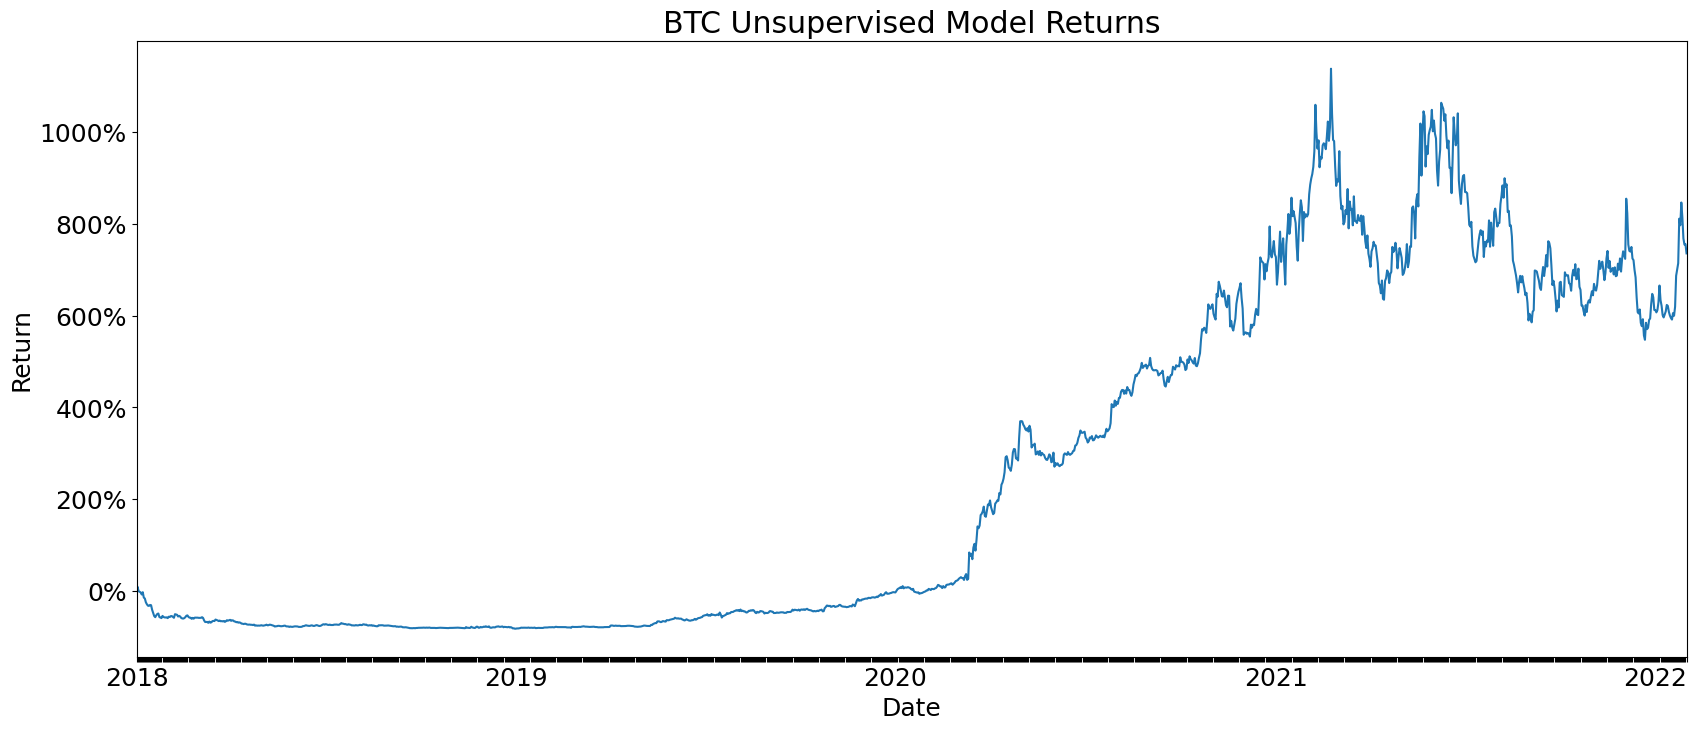

In [12]:
import matplotlib.ticker as mtick
plt.rcParams.update({'font.size': 18})

strategy_cumulative_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)

strategy_cumulative_return.plot(figsize=(20,8))

plt.title('BTC Unsupervised Model Returns')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')
plt.xticks(daily_return_df.index)
plt.xlabel('Date')

plt.show()
#BTC returned 176.20% between 2018-01-01 and 2022-01-31